### Import Required packages

In [44]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import statsmodels.api as sm

## __Import and explore sample dataset for random month (November 2017)__

In [8]:
df = pd.read_excel('MAY-2016.xls', sheetname=None, skiprows=[0], ignore_index=True)

In [9]:
cdf = pd.concat(df.values())

In [536]:
cdf.columns

Index(['Aadhar Id', 'Address', 'Advice', 'Age', 'Appt Time', 'BPL CardNumber',
       'Blood Glucose', 'Blood Pressure', 'Body Temparature', 'City',
       'Clinic Address', 'Consult Id', 'Diagnosis', 'District', 'Doctor Name',
       'Facility Id', 'Gender', 'Heamoglobin', 'Height', 'Marital status',
       'Mobile Number', 'Mother's Name', 'Patient Mobile Number',
       'Patient Name', 'Physical Examination', 'Pin Code', 'Prescription',
       'Pulse', 'Referrals', 'Respiratory rate', 'SPO2', 'Symptoms', 'Test',
       'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Uring Glucose',
       'weight'],
      dtype='object')

In [79]:
print("Fever:", cdf['Symptoms'].str.contains('Fever').value_counts()[1])
print("Pain:", cdf['Symptoms'].str.contains('Pain').value_counts()[1])
print("Loose Motions:", cdf['Symptoms'].str.contains('Motions').value_counts()[1])
print("Cough:", cdf['Symptoms'].str.contains('Cough').value_counts()[1])
print("Itching:", cdf['Symptoms'].str.contains('Itching').value_counts()[1])
print("Acidity:", cdf['Symptoms'].str.contains('Acid').value_counts()[1])
print("Weakness:", cdf['Symptoms'].str.contains('Weak').value_counts()[1])
print("Toothache:", cdf['Symptoms'].str.contains('Tooth').value_counts()[1])
print("Injury:", cdf['Symptoms'].str.contains('Injury').value_counts()[1])
print("Antihypertensive:", cdf['Symptoms'].str.contains('Antihypertensive').value_counts()[1])
print("Other:", cdf['Symptoms'].str.contains('Other').value_counts()[1])

Fever: 3598
Pain: 5466
Loose Motions: 2
Cough: 2260
Itching: 2701
Acidity: 1405
Weakness: 3680
Toothache: 295
Injury: 432
Antihypertensive: 609
Other: 3601


In [56]:
cdf['Symptoms'].str.contains('pain').value_counts()

False    45159
True     10614
Name: Symptoms, dtype: int64

In [13]:
cdf['Symptoms'].str.contains('cough').value_counts()

False    51823
True      3950
Name: Symptoms, dtype: int64

In [2]:
df = pd.read_excel('NOV-2017.xls', sheetname=None, skiprows=[0], ignore_index=True)

In [510]:
cdf = pd.concat(df.values())

In [1]:
cdf

NameError: name 'cdf' is not defined

### Sample distribution for November 2017: Male vs. Female patient visits

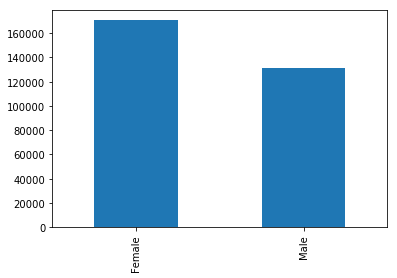

In [28]:
cdf['Gender'].value_counts().plot.bar()
plt.show()

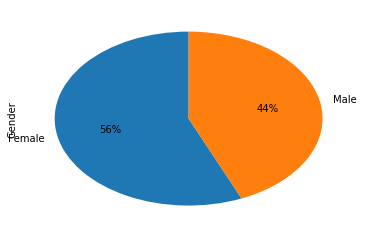

In [40]:
cdf['Gender'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90)
plt.show()

## Check for erroneous 'Age' entry (given average life expectancy in Delhi is around 73 years)
### Code checks number of patient entries where Age > 100

### Define temporary dataframe with only age entries such that Age < 90

In [4]:
temp = cdf[cdf["Age"] < 90]

### Histogram of age distribution for month of November

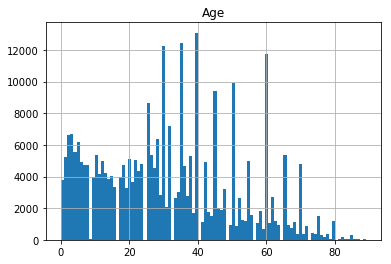

In [106]:
temp[temp['Age'] > 0].hist(column = 'Age',bins=100)
plt.show()

### Descriptive metrics for Age of visiting patients for month of November (2017)

In [103]:
temp['Age'].describe()

count    302332.000000
mean         31.266284
std          19.801451
min           0.000000
25%          15.000000
50%          30.000000
75%          45.000000
max          89.000000
Name: Age, dtype: float64

In [27]:
len(temp[(temp['Age'] >= 0) & (temp['Age'] < 6)])
len(temp[(temp['Age'] >= 6) & (temp['Age'] < 19)])
len(temp[(temp['Age'] >= 19) & (temp['Age'] < 50)])
len(temp[(temp['Age'] >= 50) & (temp['Age'] < 61)])
len(temp[(temp['Age'] >= 61) & (temp['Age'] < 100)])

25529

### Table of distribution of symptoms for November 2017

### _Distribution of patients visiting across districts in New Delhi (probably influenced by location of clinics)_

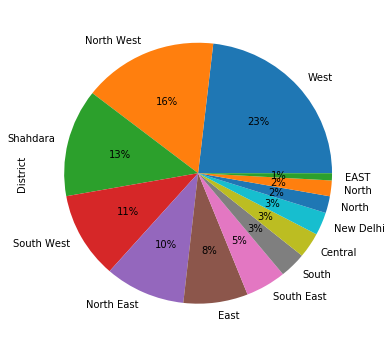

In [72]:
cdf['District'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(6,6))
plt.show()

### Total visits in November 2017 (after removing faulty age entries)

In [114]:
total_visits = cdf.shape[0]
print(total_visits)

302607


<h1><center>This code explores trends cummulatively across every month since data availability (May-2016 to May-2018) </center></h1>


In [116]:
FileList = glob.glob('*-201*')
print(FileList)

['APRIL-2017.xls', 'APRIL-2018.xls', 'AUGUST-2016.xls', 'AUGUST-2017.xls', 'DEC-2016.xls', 'DEC-2017.xls', 'FEB-2017.xls', 'FEB-2018.xls', 'JAN-2017.xls', 'JAN-2018.xls', 'JULY-2016.xls', 'JULY-2017.xls', 'JUNE-2016.xls', 'JUNE-2017.xls', 'MAR-2017.xls', 'MAR-2018.xls', 'MAY-2016.xls', 'MAY-2017.xls', 'MAY-2018.xls', 'NOV-2016.xls', 'NOV-2017.xls', 'OCT-2017.xls', 'OCTOBER-2016.xls', 'SEP-2017.xls', 'SEPTEMBER-2016.xls']


In [ ]:
months = ["JAN", "FEB", "MAR", "APRIL"]
years = ["2016.xls","2017.xls"]
FileList.sort(key=lambda x: months.index(x.split('-')[0]))
FileList.sort(key=lambda x: years.index(x.split('-')[1]))

### Import Excel files, clean up and sort datasets by chronological order

In [121]:
months = ["JAN", "FEB", "MAR", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEP","SEPTEMBER","OCTOBER","OCT", "NOV", "DEC"]
years = ["2016.xls","2017.xls","2018.xls"]
FileList.sort(key=lambda x: months.index(x.split('-')[0]))
FileList.sort(key=lambda x: years.index(x.split('-')[1]))
print(FileList[0:12])

['MAY-2016.xls', 'JUNE-2016.xls', 'JULY-2016.xls', 'AUGUST-2016.xls', 'SEPTEMBER-2016.xls', 'OCTOBER-2016.xls', 'NOV-2016.xls', 'DEC-2016.xls', 'JAN-2017.xls', 'FEB-2017.xls', 'MAR-2017.xls', 'APRIL-2017.xls']


In [13]:
month_list = []
volume_list = []
age_1 = []
age_2 = []
age_3 = []
age_4 = []
age_5 = []


for x in FileList:
    df = pd.read_excel(x, sheetname=None, skiprows=[0], ignore_index=True)
    cdf = pd.concat(df.values())
    month_list.append(x.split('.xls')[0])
    volume_list.append(len(cdf))
    age_1.append(len(cdf[(cdf['Age'] >= 0) & (cdf['Age'] < 6)]))
    age_2.append(len(cdf[(cdf['Age'] >= 6) & (cdf['Age'] < 19)]))
    age_3.append(len(cdf[(cdf['Age'] >= 19) & (cdf['Age'] < 50)]))
    age_4.append(len(cdf[(cdf['Age'] >= 50) & (cdf['Age'] < 61)]))
    age_5.append(len(cdf[(cdf['Age'] >= 61) & (cdf['Age'] < 90)]))

d = {'Month': month_list, 'Volume': volume_list, '0-5': age_1, '6-18' : age_2, '19-49': age_3, '50-60': age_4, '60 and above': age_5 }
vdf = pd.DataFrame(data=d)

In [460]:
new_df = pd.concat([rdf,cdf[['Symptoms']]])

In [509]:
## Create dataset with symptoms
all_symptoms = pd.DataFrame()
for x in FileList:
    df = pd.read_excel(x, sheetname=None, skiprows=[0], ignore_index=True)
    cdf = pd.concat(df.values())
    all_symptoms = pd.concat([all_symptoms,cdf[['Symptoms']]],ignore_index=True)

In [510]:
all_diagnosis = pd.DataFrame()
for x in FileList:
    df = pd.read_excel(x, sheetname=None, skiprows=[0], ignore_index=True)
    cdf = pd.concat(df.values())
    all_diagnosis = pd.concat([all_diagnosis,cdf[['Diagnosis']]],ignore_index=True)

In [511]:
all_prescriptions = pd.DataFrame()
for x in FileList:
    df = pd.read_excel(x, sheetname=None, skiprows=[0], ignore_index=True)
    cdf = pd.concat(df.values())
    all_prescriptions = pd.concat([all_prescriptions,cdf[['Prescription']]],ignore_index=True)

In [744]:
stata_df = pd.DataFrame()
for x in FileList:
    df = pd.read_excel(x, sheetname=None, skiprows=[0], ignore_index=True)
    cdf = pd.concat(df.values())
    stata_df = stata_df.append(cdf, ignore_index=True)

In [792]:
stata_new = stata_df[['District', 'Facility Id', 'Clinic Address', 'Pin Code', 'Age', 'Gender', 'Symptoms', 'Diagnosis', 'Prescription']]

In [809]:
stata_new.rename(columns={' ':'Reason'}, inplace=True)

/Users/arjunsoin/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [800]:
stata_new.rename(columns={'Facility Id':'Facility_Id'}, inplace=True)
stata_new.rename(columns={'Clinic Address':'Address'}, inplace=True)
stata_new.rename(columns={'Pin Code':'Pin_Code'}, inplace=True)

/Users/arjunsoin/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [827]:
# Create some Pandas dataframes from some data.
df1 = stata_new.loc[0:1000000]
df2 = stata_new.loc[1000001:2000000]
df3 = stata_new.loc[2000001:3000000]
df4 = stata_new.loc[3000001:4000000]
df5 = stata_new.loc[4000001:5000000]
df6 = stata_new.loc[5000001:6000000]
df7 = stata_new.loc[6000001:6756578]

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('pandas_multiple.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df1.to_excel(writer, sheet_name='Sheet1')
df2.to_excel(writer, sheet_name='Sheet2')
df3.to_excel(writer, sheet_name='Sheet3')
df4.to_excel(writer, sheet_name='Sheet4')
df5.to_excel(writer, sheet_name='Sheet5')
df6.to_excel(writer, sheet_name='Sheet6')
df7.to_excel(writer, sheet_name='Sheet7')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [492]:
all_diagnosis['Diagnosis'].value_counts()[all_diagnosis['Diagnosis'].value_counts()>50]

Cough                                                                                                567232
Acute upper respiratory infections                                                                   355682
Bodyache                                                                                             352264
Other :Specify in advice                                                                             348726
Generalised weakness                                                                                 345199
Viral fever                                                                                          339667
Acute nasopharyngities( common cold )                                                                188560
Fever of unknown origin                                                                              180928
Backache                                                                                             169901
Type 2 Diabetes Mellitus    

In [498]:
type(all_symptoms['Symptoms'][1:])

pandas.core.series.Series

In [474]:
len(all_symptoms) - all_symptoms.isnull().sum()[0]

6288660

In [512]:
## Merge symptoms, diagnosis and prescriptions
sym_diag_pres = pd.concat([all_symptoms, all_diagnosis, all_prescriptions], axis=1, join_axes=[all_symptoms.index])

## Mapping of symptoms diagnosis and prescription

In [609]:
## Dataset imported with symptoms, diagnosis and prescription 
sym_diag_pres['Prescription'].value_counts()

General Counselling. \n                                                                                                                                                                                                                           355544
Paracetamol 500mg tab,1-0-1,3 days. \n                                                                                                                                                                                                             44642
Levocetirizine5mg tab,0-0-1,3 days. \n                                                                                                                                                                                                             22056
Paracetamol 500mg tab,1-0-1,2 days. \n                                                                                                                                                                                                             18118
Para

In [514]:
##check for Null columns
sym_diag_pres.isnull().sum()

Symptoms        467919
Diagnosis       470371
Prescription    470299
dtype: int64

In [344]:
##result[result['Diagnosis'] == 'Cough']['Prescription'].value_counts()

In [535]:
result[result['Diagnosis'] == 'Cough']['Symptoms'].value_counts()

Dry cough-03                                                                                                107378
Dry cough-02                                                                                                 61288
Dry cough-04                                                                                                 54349
Dry cough-05                                                                                                 32657
Cough with sputum-03                                                                                         29023
Cough expectoration-03                                                                                       22669
Fever-02                                                                                                     17760
Fever-03                                                                                                     16639
Cough expectoration-06                                                          

## Create a new dataframe with a column for 'Month', 'Volume' and Age Range of patients

In [500]:
cols = ['Month','Volume','0-5','6-18','19-49','50-60','60 and above']
vdf = vdf[cols]

In [15]:
dummies = pd.get_dummies(vdf['Month'])

In [21]:
volume_dataset = vdf[['Volume']]

In [ ]:
new_vdf.ix[1:, 7:]

In [37]:
new_vdf = vdf.join(dummies)

In [388]:
month_dummyDf = month_dummyDf.drop(['MAY-2016'], axis = 1)

In [386]:
month_dummyDf = new_vdf.ix[1:, 7:]

In [410]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(month_dummyDf,volume_dataset_regress['Volume'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [411]:
coefficients=pd.DataFrame({'name':list(month_dummyDf),'value':model_1.coef_})

In [413]:
residuals=pd.DataFrame({'name':list(month_dummyDf),'value': volume_dataset_regress['Volume'] - model_1.predict(month_dummyDf)})

In [419]:
residuals

,name,value
1,APRIL-2017,8.731149e-11
2,APRIL-2018,0.000000e+00
3,AUGUST-2016,0.000000e+00
4,AUGUST-2017,-2.910383e-11
5,DEC-2016,-2.910383e-11
6,DEC-2017,0.000000e+00
7,FEB-2017,-5.820766e-11
8,FEB-2018,0.000000e+00
9,JAN-2017,0.000000e+00
10,JAN-2018,0.000000e+00


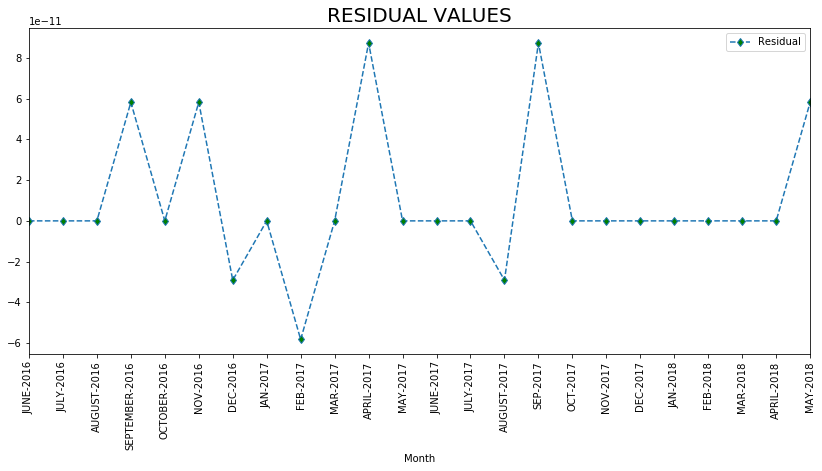

In [430]:
ordered_df.plot(x="Month", y="Residual",figsize=(14,6), marker='d', markerfacecolor='g', linestyle='dashed')
plt.xticks(ordered_df.index, ordered_df['Month'], rotation=90)
plt.title("RESIDUAL VALUES", fontsize = 20)
plt.show()

In [425]:
months = []
values = []

for i in month_list[1:]:
    months.append(i)
    values.append(residuals[residuals['name']==i]['value'].values[0])

ordered_df = pd.DataFrame({'Month': months,'Residual': values})

In [402]:
volume_dataset_regress = volume_dataset[['Volume']][1:]

In [ ]:
X = df[[“RM”, “LSTAT”]]
y = volume_dataset_regress['Volume']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

In [391]:
indicator_months = month_dummyDf.columns.get_values().tolist()

In [226]:
residuals[residuals['name']=='MAY-2017']['value'].values[0]

1.1641532182693481e-10

In [227]:
months = []
values = []
months_needed = month_list - 'APRIL-2016'

for i in month_list:
    months.append(i)
    values.append(residuals[residuals['name']==i]['value'].values[0])

ordered_df = pd.DataFrame({'Month': months,'Residual': values})

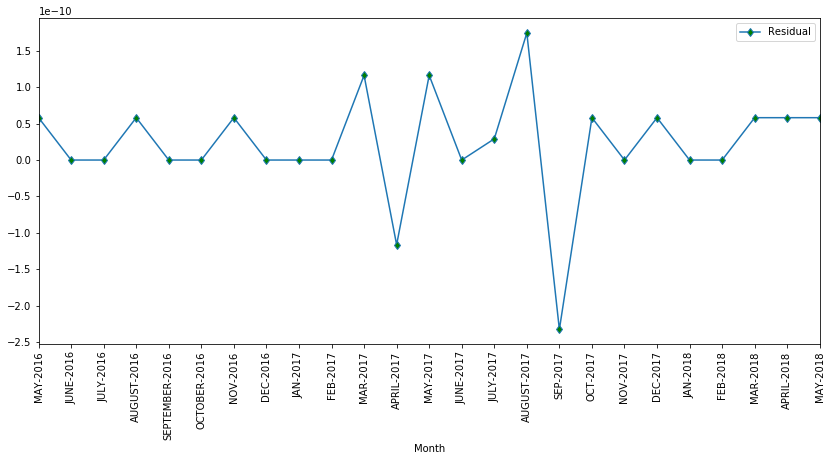

In [230]:
ordered_df.plot(x="Month", y="Residual",figsize=(14,6), marker='d', markerfacecolor='g')
plt.xticks(ordered_df.index, vdf['Month'], rotation=90)
plt.show()

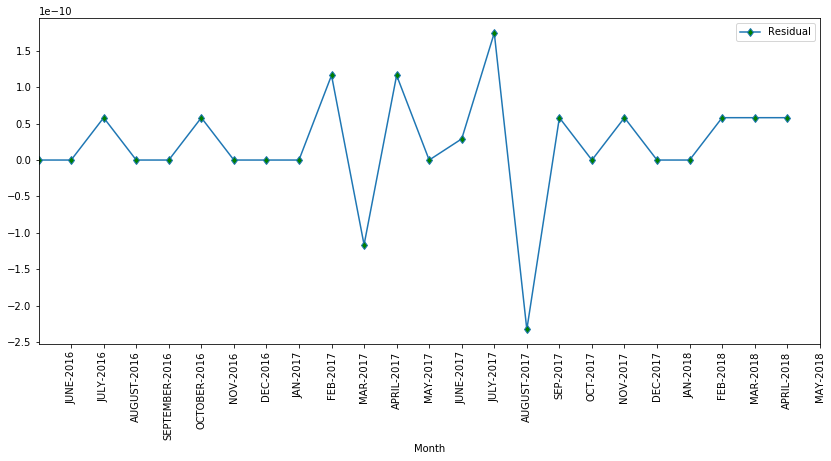

In [235]:
ordered_df[1:].plot(x="Month", y="Residual",figsize=(14,6), marker='d', markerfacecolor='g')
plt.xticks(ordered_df[1:].index, ordered_df[1:]['Month'], rotation=90)
plt.show()

#### Total number of patients visiting since data availability 

In [77]:
import statsmodels.formula.api as sm

In [138]:
result = sm.ols(formula="Volume ~ C(Month)", data=new_vdf).fit()

In [34]:
vdf.sum()

Month           MAY-2016JUNE-2016JULY-2016AUGUST-2016SEPTEMBER...
Volume                                                    6756579
0-5                                                        727563
6-18                                                      1201133
19-49                                                     3046338
50-60                                                      789422
60 and above                                               527503
dtype: object

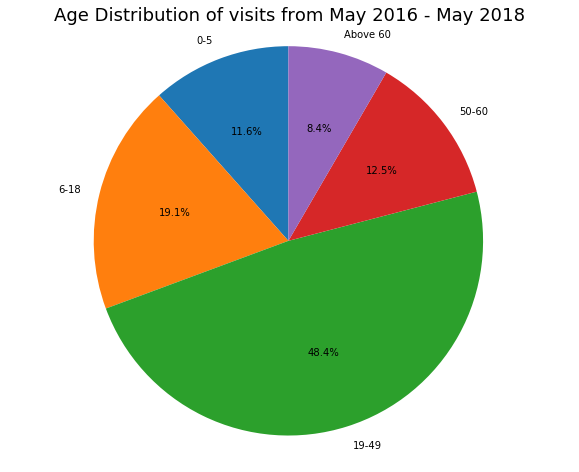

In [102]:
labels = '0-5', '6-18', '19-49', '50-60', 'Above 60'
sizes = [vdf.sum()[2],vdf.sum()[3],vdf.sum()[4],vdf.sum()[5],vdf.sum()[6]]
##explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Age Distribution of visits from May 2016 - May 2018',fontsize = 18)
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

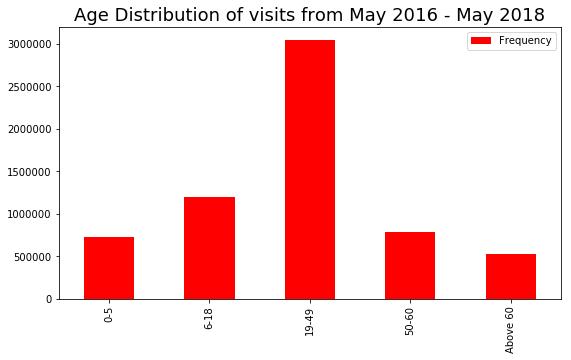

In [129]:
age_df = pd.DataFrame([sizes], columns=labels) 
row = age_df.iloc[0]
row.plot(kind='bar',color = 'r', figsize = (9,5), label = "Frequency")
plt.title('Age Distribution of visits from May 2016 - May 2018',fontsize = 18)
plt.legend()
plt.show()

## Time series frequency trends of total patient visitations till date

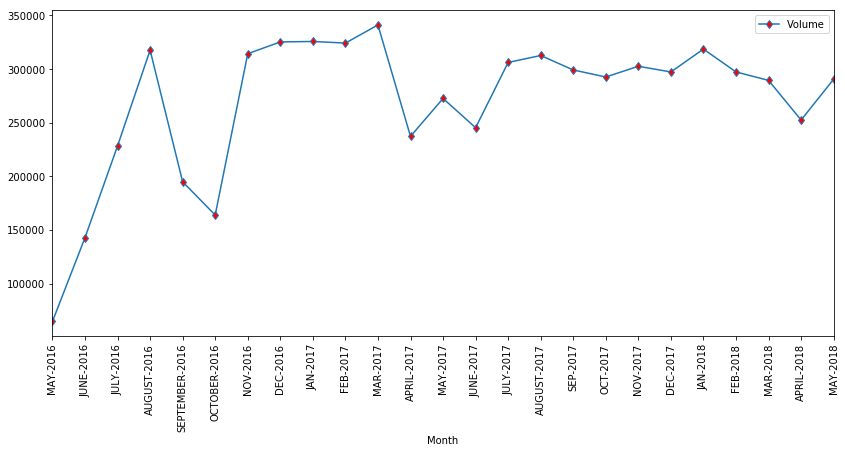

In [193]:
vdf.plot(x="Month", y="Volume",figsize=(14,6), marker='d', markerfacecolor='r')
plt.xticks(vdf.index, vdf['Month'], rotation=90)
plt.show()

## Zoom into April to check effect of Elections

In [82]:
pre_df = pd.read_excel('APRIL-2017.xls', sheetname=None, skiprows=[0], ignore_index=True)

In [96]:
before = []
for i in range(1,10):
    before.append('2017-04-0'+str(i))
for i in range(10,23):
    before.append('2017-04-'+str(i))

In [107]:
after_april = []
for i in range(23,30):
    after_april.append('2017-04-'+str(i))

In [115]:
after_may = []
for i in range(1,10):
    after_may.append('2017-05-0'+str(i))
for i in range(10,32):
    after_may.append('2017-05-'+str(i))

In [122]:
before_march = []
for i in range(21,32):
    before_march.append('2017-03-'+str(i))

In [124]:
pre_MARCHdf = pd.read_excel('MAR-2017.xls', sheetname=before_march, skiprows=[0], ignore_index=True)

In [128]:
preMARCH_cdf = pd.concat(pre_MARCHdf.values())

In [98]:
pre_df = pd.read_excel('APRIL-2017.xls', sheetname=before, skiprows=[0], ignore_index=True)

In [129]:
pre_cdf = pd.concat(pre_df.values())

In [132]:
len(pre_cdf) + len(preMARCH_cdf) 

273144

In [108]:
post_april = pd.read_excel('APRIL-2017.xls', sheetname=after_april, skiprows=[0], ignore_index=True)

In [109]:
post_aprilCDF = pd.concat(post_april.values())

In [133]:
post_may = pd.read_excel('MAY-2017.xls', sheetname=after_may, skiprows=[0], ignore_index=True)

In [136]:
post_mayCDF = pd.concat(post_may.values())

In [137]:
len(post_aprilCDF) + len(post_mayCDF)

334947

## Make plot for 15 day intervals between Jan, Feb, March, April, May, June, July

In [238]:
jan_before_1 = []
jan_before_2 = []
for i in range(1,10):
    jan_before_1.append('2017-01-0'+str(i))
for i in range(10,16):
    jan_before_1.append('2017-01-'+str(i))
for i in range(16,32):
    jan_before_2.append('2017-01-'+str(i))

In [241]:
VOLUME_1 = []
pre_jan_1 = pd.read_excel('JAN-2017.xls', sheetname=jan_before_1, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_jan_1.values())))
pre_jan_2 = pd.read_excel('JAN-2017.xls', sheetname=jan_before_2, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_jan_2.values())))

In [247]:
feb_before_1 = []
feb_before_2 = []
for i in range(1,10):
    feb_before_1.append('2017-02-0'+str(i))
for i in range(10,15):
    feb_before_1.append('2017-02-'+str(i))
for i in range(15,29):
    feb_before_2.append('2017-02-'+str(i))

In [248]:
pre_feb_1 = pd.read_excel('FEB-2017.xls', sheetname=feb_before_1, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_feb_1.values())))
pre_feb_2 = pd.read_excel('FEB-2017.xls', sheetname=feb_before_2, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_feb_2.values())))

In [249]:
mar_before_1 = []
mar_before_2 = []
for i in range(1,10):
    mar_before_1.append('2017-03-0'+str(i))
for i in range(10,16):
    mar_before_1.append('2017-03-'+str(i))
for i in range(16,32):
    mar_before_2.append('2017-03-'+str(i))

In [250]:
pre_mar_1 = pd.read_excel('MAR-2017.xls', sheetname=mar_before_1, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_mar_1.values())))
pre_mar_2 = pd.read_excel('MAR-2017.xls', sheetname=mar_before_2, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_mar_2.values())))

In [257]:
april_before_1 = []
april_before_2 = []
for i in range(1,10):
    april_before_1.append('2017-04-0'+str(i))
for i in range(10,15):
    april_before_1.append('2017-04-'+str(i))
for i in range(15,30):
    april_before_2.append('2017-04-'+str(i))

In [258]:
pre_april_1 = pd.read_excel('APRIL-2017.xls', sheetname=april_before_1, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_april_1.values())))
pre_april_2 = pd.read_excel('APRIL-2017.xls', sheetname=april_before_2, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_april_2.values())))

In [260]:
may_before_1 = []
may_before_2 = []
for i in range(1,10):
    may_before_1.append('2017-05-0'+str(i))
for i in range(10,16):
    may_before_1.append('2017-05-'+str(i))
for i in range(16,32):
    may_before_2.append('2017-05-'+str(i))

In [263]:
pre_may_1 = pd.read_excel('MAY-2017.xls', sheetname=may_before_1, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_may_1.values())))
pre_may_2 = pd.read_excel('MAY-2017.xls', sheetname=may_before_2, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_may_2.values())))

In [278]:
june_before_1 = []
june_before_2 = []
for i in range(1,10):
    june_before_1.append('2017-06-0'+str(i))
for i in range(10,15):
    june_before_1.append('2017-06-'+str(i))
for i in range(15,31):
    june_before_2.append('2017-06-'+str(i))

In [276]:
VOLUME_1 = set(VOLUME_1)

In [277]:
VOLUME_1 = list(VOLUME_1)

In [279]:
pre_june_1 = pd.read_excel('JUNE-2017.xls', sheetname=june_before_1, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_june_1.values())))
pre_june_2 = pd.read_excel('JUNE-2017.xls', sheetname=june_before_2, skiprows=[0], ignore_index=True)
VOLUME_1.append(len(pd.concat(pre_june_2.values())))

In [281]:
times = ['Jan 1 - 15','Jan 16 - 31', 'Feb 1 - 14', 'Feb 15 - 28', 'March 1 - 15', 'March 16 - 31', 'April 1 - 14', 'April 15 - 30', 'May 1 - 15', 'May 16 - 31', 'June 1 - 14', 'June 15 - 30']

In [286]:
len(times)

12

In [295]:
len(pd.concat(pre_mar_2.values()))

144303

In [301]:
VOLUME_1 = [len(pd.concat(pre_jan_1.values())),len(pd.concat(pre_jan_2.values())),len(pd.concat(pre_feb_1.values())),len(pd.concat(pre_feb_2.values())),len(pd.concat(pre_mar_1.values())),len(pd.concat(pre_mar_2.values())),len(pd.concat(pre_april_1.values())),len(pd.concat(pre_april_2.values())), len(pd.concat(pre_may_1.values()))
           , len(pd.concat(pre_may_2.values())), len(pd.concat(pre_june_1.values())), len(pd.concat(pre_june_2.values()))]

In [302]:
len(VOLUME_1)

12

In [303]:
data = {'Timeframe': times, 'Volume': VOLUME_1}
firstHalf17_df = pd.DataFrame(data=data)

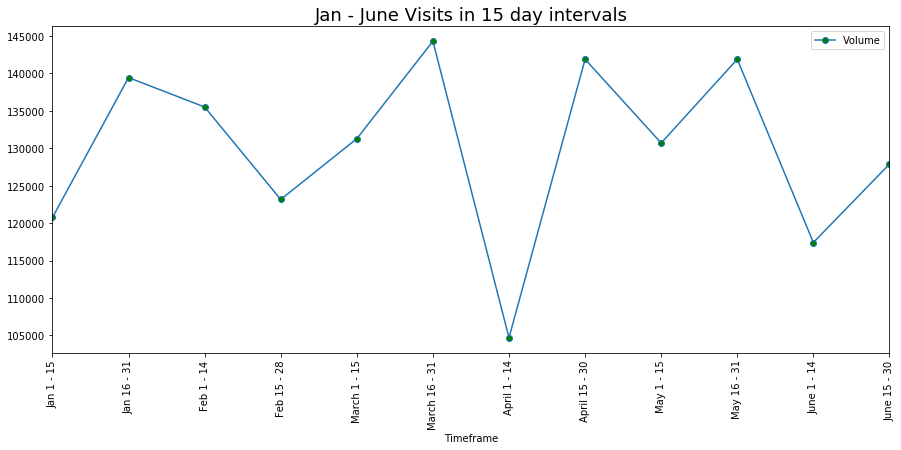

In [352]:
firstHalf17_df.plot(x="Timeframe", y="Volume",figsize=(15,6), marker='o', markerfacecolor='g')
plt.xticks(firstHalf17_df.index, firstHalf17_df['Timeframe'], rotation=90)
plt.title("Jan - June Visits in 15 day intervals", fontsize=18)
plt.show()

In [9]:
def generate_volume(month,lister, x, y):
    before = []
    for i in range(x,y):
        if i < 10:
            before.append('2016-11-0'+str(i))
        else:
            before.append('2016-11-'+str(i))
    
    pre = pd.read_excel(month, sheetname=before, skiprows=[0], ignore_index=True)
    lister.append(len(pd.concat(pre.values())))

In [638]:
def generate_dates(lister, x, y):
    for i in range(x,y):
        if i < 10:
            lister.append('2017-04-0'+str(i))
        else:
            lister.append('2017-04-'+str(i))

listed = []
generate_dates(listed, 1, 21)

In [92]:
xls = pd.ExcelFile('NOV-2016.xls')

In [105]:
extra = ['Nov16']
needed_set = set(xls.sheet_names) - set(listed) - set(extra)
needed_list = list(needed_set)

In [94]:
xlsd = pd.ExcelFile('DEC-2016.xls')

In [95]:
extra = ['Dec16']
dec_set = set(xlsd.sheet_names) - set(extra)
dec_list = list(dec_set)

In [109]:
post_demon = pd.read_excel('NOV-2016.xls', sheetname=needed_list, skiprows=[0], ignore_index=True)
post_demon_df = pd.concat(post_demon.values())
post_demon_dec = pd.read_excel('DEC-2016.xls', sheetname=dec_list, skiprows=[0], ignore_index=True)
post_demon_dec_df = pd.concat(post_demon_dec.values())
post_demon_df = pd.concat([post_demon_dec_df[['Diagnosis']],post_demon_df[['Diagnosis']]],ignore_index=True)

### Top Diagnoses after 8th November 2016 until 30 December 2016 - the 50 day period within which demonetized notes could be deposited in banks and exchanged for legal tender

In [110]:
post_demon_df['Diagnosis'].value_counts()[0:23]

Cough                                    51078
Acute upper respiratory infections       32787
Bodyache                                 24469
Other :Specify in advice                 23728
Viral fever                              19969
Generalised weakness                     19260
Backache                                 13761
Acute nasopharyngities( common cold )    13595
Type 2 Diabetes Mellitus                 10979
Gastroenteritis                          10062
Fever of unknown origin                   9726
Skin problems                             7393
Arthritis                                 7061
Diarrhoea gastroenteritis                 6019
Gastritis and duodenitis                  5030
Typus fever                               4975
Allergic contact dermatitis               4899
Headache                                  4853
Anemia                                    4799
Allergic rhinitis                         3998
Other :: none                             3839
Essential (pr

In [111]:
post_demon = pd.read_excel('NOV-2016.xls', sheetname=needed_list, skiprows=[0], ignore_index=True)
post_demon_df = pd.concat(post_demon.values())
post_demon_dec = pd.read_excel('DEC-2016.xls', sheetname=dec_list, skiprows=[0], ignore_index=True)
post_demon_dec_df = pd.concat(post_demon_dec.values())
post_demon_df = pd.concat([post_demon_dec_df[['Symptoms']],post_demon_df[['Symptoms']]],ignore_index=True)

### Top symptoms after 8th November 2016 until 30 December 2016 - the 50 day period within which demonetized notes could be deposited in banks and exchanged for legal tender


In [116]:
post_demon_df['Symptoms'].str.split('-').str[0].value_counts()[0:26]

Dry cough                        55838
Fever                            50005
Itching                          30666
Feeling Weak                     21463
Pain in whole body               20603
Cough with sputum                20470
Back pain                        19473
Cough expectoration              14385
Abdominal pain                   13179
Pain in all joints               12965
Other :Specify in advice         12057
Acidity                          11387
Antidiabetic                     10553
Loose motions without blood       9122
Headache                          8452
Antihypertensive                  8440
Gas in abdomen                    6663
Running nose                      6590
Other :: cold                     5703
Injury                            5193
Pain in knees                     4751
Pain in the calf muscles/legs     3951
Other :: none                     3645
Constipation                      3598
Breathlessness                    2791
Vomiting                 

In [113]:
extra = ['Oct16']
oct_list = set(pd.ExcelFile('OCTOBER-2016.xls').sheet_names) - set(extra)

In [117]:
extra = ['Sep16']
sep_list = set(pd.ExcelFile('SEPTEMBER-2016.xls').sheet_names) - set(extra)

In [120]:
post_demon_sep = pd.read_excel('SEPTEMBER-2016.xls', sheetname=list(sep_list), skiprows=[0], ignore_index=True)
df_sep = pd.concat(post_demon_sep.values())
post_demon = pd.read_excel('OCTOBER-2016.xls', sheetname=list(oct_list), skiprows=[0], ignore_index=True)
post_demon_df = pd.concat(post_demon.values())
post_demon_dec = pd.read_excel('NOV-2016.xls', sheetname=listed, skiprows=[0], ignore_index=True)
post_demon_dec_df = pd.concat(post_demon_dec.values())
post_demon_df = pd.concat([post_demon_dec_df[['Diagnosis']],post_demon_df[['Diagnosis']],df_sep[['Diagnosis']]],ignore_index=True)

### Top Diagnoses in a similar period before demonetization 

In [121]:
post_demon_df['Diagnosis'].value_counts()[0:23]

Viral fever                              35767
Cough                                    25235
Acute upper respiratory infections       20724
Bodyache                                 18844
Other :Specify in advice                 17623
Fever of unknown origin                  16766
Generalised weakness                     14612
Backache                                  7546
Acute nasopharyngities( common cold )     6255
Type 2 Diabetes Mellitus                  5672
Gastroenteritis                           5385
Skin problems                             4797
Abnormal and pelvic pain                  4593
Arthritis                                 4324
Anemia                                    3792
Headache                                  2645
Other :: none                             2476
Gastritis and duodenitis                  2466
Allergic contact dermatitis               2371
Diarrhoea gastroenteritis                 2353
Boils                                     2345
Allergic rhin

In [122]:
post_demon_sep = pd.read_excel('SEPTEMBER-2016.xls', sheetname=list(sep_list), skiprows=[0], ignore_index=True)
df_sep = pd.concat(post_demon_sep.values())
post_demon = pd.read_excel('OCTOBER-2016.xls', sheetname=list(oct_list), skiprows=[0], ignore_index=True)
post_demon_df = pd.concat(post_demon.values())
post_demon_dec = pd.read_excel('NOV-2016.xls', sheetname=listed, skiprows=[0], ignore_index=True)
post_demon_dec_df = pd.concat(post_demon_dec.values())
post_demon_df = pd.concat([post_demon_dec_df[['Symptoms']],post_demon_df[['Symptoms']],df_sep[['Symptoms']]],ignore_index=True)

### Top Symptoms in a similar period before demonetization 

In [123]:
post_demon_df['Symptoms'].str.split('-').str[0].value_counts()[0:26]

Fever                            75816
Dry cough                        25588
Itching                          18647
Pain in whole body               17033
Feeling Weak                     16555
Back pain                        10630
Pain in all joints                9866
Cough with sputum                 9745
Abdominal pain                    9047
Cough expectoration               7363
Acidity                           6111
Other :Specify in advice          6017
Antidiabetic                      5305
Headache                          4566
Running nose                      4024
Loose motions without blood       3935
Antihypertensive                  3541
Gas in abdomen                    2900
Injury                            2695
Other :: cold                     2646
Pain in knees                     2589
Other :: none                     2428
Pain in the calf muscles/legs     2296
Pain in throat                    2118
Constipation                      1855
Fever with rigore/chills 

## Top Symptoms before Elections (20 days preceding)

In [639]:
april_xls = pd.ExcelFile('APRIL-2017.xls')

In [640]:
april_needed = set(april_xls.sheet_names) - set(listed)

In [652]:
pre_elec_april = pd.read_excel('APRIL-2017.xls', sheetname=listed, skiprows=[0], ignore_index=True)
df_april_pre = pd.concat(pre_elec_april.values())

In [653]:
df_april_pre['Symptoms'].str.split('-').str[0].value_counts()[0:26]

Fever                            16205
Itching                          12748
Dry cough                        12520
Feeling Weak                      9663
Back pain                         7497
Pain in whole body                6964
Cough with sputum                 5282
Loose motions without blood       5006
Acidity                           4984
Antidiabetic                      4809
Abdominal pain                    4690
Other :Specify in advice          4532
Pain in all joints                4025
Feeling low                       3544
Antihypertensive                  3442
Cough expectoration               3263
Headache                          2931
Gas in abdomen                    2827
Pain in knees                     2579
Pain in the calf muscles/legs     1846
Running nose                      1698
Injury                            1571
Antithyroid                       1341
Constipation                      1238
Pain in throat                    1142
Vomiting                 

## Top Diagnosis before Elections (20 days preceding)

In [658]:
df_april_pre['Diagnosis'].value_counts()[0:23]

Cough                                    12237
Bodyache                                 10370
Generalised weakness                      9377
Other :Specify in advice                  7825
Acute upper respiratory infections        6411
Viral fever                               5629
Backache                                  5451
Type 2 Diabetes Mellitus                  4952
Gastroenteritis                           4380
Acute nasopharyngities( common cold )     3785
Fever of unknown origin                   3588
Skin problems                             3581
Diarrhoea gastroenteritis                 3315
Arthritis                                 2832
Anemia                                    2389
Allergic contact dermatitis               2048
Hypothyroidism                            1751
Gastritis and duodenitis                  1740
Essential (primary) hypertension          1693
Typus fever                               1655
Headache                                  1562
Urticaria    

## Top Symptoms after elections

In [655]:
post_elec_april = pd.read_excel('APRIL-2017.xls', sheetname=list(april_needed), skiprows=[0], ignore_index=True)
df_postapril = pd.concat(post_elec_april.values())
post_elec_may = pd.read_excel('MAY-2017.xls', sheetname=['2017-05-01','2017-05-02','2017-05-03','2017-05-04','2017-05-05'], skiprows=[0], ignore_index=True)
post_may_df = pd.concat(post_elec_may.values())
post_elections = pd.concat([df_postapril,post_may_df],ignore_index=True)

In [656]:
post_elections['Symptoms'].str.split('-').str[0].value_counts()[0:20]

Fever                            15393
Dry cough                        11370
Feeling Weak                      9428
Itching                           9124
Pain in whole body                6026
Back pain                         5714
Loose motions without blood       4697
Cough with sputum                 4561
Acidity                           4505
Abdominal pain                    4345
Other :Specify in advice          3953
Antidiabetic                      3832
Pain in all joints                3263
Antihypertensive                  2750
Cough expectoration               2702
Headache                          2594
Feeling low                       2589
Gas in abdomen                    2554
Pain in knees                     1805
Pain in the calf muscles/legs     1492
Name: Symptoms, dtype: int64

## Top Diagnosis after elections

In [657]:
post_elections['Diagnosis'].value_counts()[0:22]

Cough                                    11470
Generalised weakness                      8826
Bodyache                                  8373
Acute upper respiratory infections        5431
Viral fever                               5269
Other :Specify in advice                  5068
Fever of unknown origin                   3906
Type 2 Diabetes Mellitus                  3858
Gastroenteritis                           3774
Backache                                  3707
Diarrhoea gastroenteritis                 3213
Acute nasopharyngities( common cold )     2932
Skin problems                             2570
Arthritis                                 2511
Anemia                                    2327
Allergic contact dermatitis               1650
Typus fever                               1635
Headache                                  1604
Hypothyroidism                            1572
Essential (primary) hypertension          1549
Gastritis and duodenitis                  1524
Urticaria    

## Data on election results (Winner, District, Vote share and Win Margin) to be merged with data on whether or not district contains clinic

In [1581]:
election_data = pd.read_excel('Election_results.xlsx')

In [141]:
clinic_list = pd.read_excel('APRIL-2018.xls', sheetname='2018-04-30', skiprows=[0], ignore_index=True)

In [143]:
clinic_cities = clinic_list[['City']]

In [122]:
## Create dataset with symptoms
all_cities = pd.DataFrame()
for x in FileList[0:12]:
    df = pd.read_excel(x, sheetname=None, skiprows=[0], ignore_index=True)
    cdf = pd.concat(df.values())
    all_cities = pd.concat([all_cities,cdf[['City']]],ignore_index=True)

In [123]:
city_list = list(set(list(all_cities['City'])))
city_list = city_list[1:len(city_list)]

In [169]:
city_list

['Contonment Board',
 'Chandni Chowk',
 'Shalimar Bagh',
 'Matiala',
 'Kirari',
 'Madipur',
 'Vikas Nagar',
 'Mustafabad',
 'Burari',
 'Nangloi',
 'Porta Cabin',
 'Badli',
 'Shakurbasti',
 'Ghonda',
 'Trilokpuri',
 'Vikas Puri',
 'Timarpur',
 'Sangam Vihar',
 'Trinagar',
 'Gokalpuri',
 'NARELA',
 'Krishna Nagar',
 'Deoli',
 'G.K I',
 'Rajouri Garden',
 'Sultanpuri',
 'Palam',
 'Mangolpuri',
 'Laxmi Nagar',
 'Najafgarh',
 'Dwarka',
 'Seemapuri',
 'Uttam Nagar',
 'Patparganj',
 'Shahdara',
 'R.K.Puram',
 'Rajinder Nagar',
 'MUNDKA',
 'Wazirpur',
 'Okhla',
 'Sadar Bazar',
 'Jangpura',
 'Chhatarpur',
 'Rohtash Nagar',
 'Seelampur',
 'Badarpur',
 'Gokalpur',
 'Babarpur',
 'Rithala',
 'Gandhi Nagar',
 'Kondli',
 'Adarsh Nagar',
 'Bawana']

In [162]:
## Loop over list of cities from patient record data and match with election ward column 
for i in range(0, len(election_data)):
    for x in city_list:
        if (election_data.iloc[i]['Ward'].lower().find(x.lower()) != -1):
            election_data.set_value(i, 'Clinic', 1)

In [163]:
## Loop over list of cities from patient record data and match with election ward column 
for i in range(0, len(election_data)):
    for x in city_list:
        if (x.lower().find(election_data.iloc[i]['Ward'].lower()) != -1):
            election_data.set_value(i, 'Clinic', 1)

### Newly generated dataset that contains Zone, Ward (Constituency), Winner, Name of Winning Candidate, Vote Share of Winner, Win Margin of Winner and Clinic (1/0 - whether or not there is a clinic present in the ward)

In [742]:
## Dataset called election_data
## election_data

#### Value counts of Clinic (0 or 1)

In [164]:
election_data['Clinic'].value_counts()

0    183
1     87
Name: Clinic, dtype: int64

In [100]:
clinic_list = pd.read_csv('aam-aadmi-mohalla-clinics-in-delhi.csv')

In [156]:
## Loop over list of cities from AAMC Official list and match with election ward column 
for i in range(0, len(election_data)):
    for x in list(clinic_list['Address']):
        if (x.lower().find(election_data.iloc[i]['Ward'].lower()) != -1):
            election_data.set_value(i, 'Clinic', 1)

In [157]:
## Loop over list of cities from AAMC Official list (assembly) and match with election ward column 
for i in range(0, len(election_data)):
    for x in list(clinic_list['Assembly']):
        if (election_data.iloc[i]['Ward'].lower().find(x.lower()) != -1):
            election_data.set_value(i, 'Clinic', 1)

In [159]:
## Loop over list of cities from AAMC Official list (assembly) and match with election ward column - this one matche
for i in range(0, len(election_data)):
    for x in list(clinic_list['Assembly']):
        if (x.lower().find(election_data.iloc[i]['Ward'].lower()) != -1):
            election_data.set_value(i, 'Clinic', 1)

In [160]:
## Loop over list of cities from AAMC Official list (assembly) and match with rented clinic list
for i in range(0, len(election_data)):
    if election_data.iloc[i]['Ward'] in open('/Users/arjunsoin/Desktop/rented_clinics.txt').read():
        election_data.set_value(i, 'Clinic', 1)

### Number of wards (districts) with Mohalla Clinic and Aam Aadmi Party Victory vs. number of wards (districts) with no Mohalla Clinic but Aam Aadmi Party Victory: Basic incumbency effect? (Since AAP is in power at state)

In [721]:
election_data[election_data['Winner'] == "Aam Aadmi Party"]['Clinic'].value_counts()

0.0    25
1.0    23
Name: Clinic, dtype: int64

### Number of wards (districts) with Mohalla Clinic and BJP Victory vs. number of wards (districts) with no Mohalla Clinic and BJP Victory: Strength of anti-incumbency? (BJP Won MCD Civic elections)

In [732]:
election_data[election_data['Winner'] == "Bharatiya Janata Party"]['Clinic'].value_counts()

0.0    122
1.0     59
Name: Clinic, dtype: int64

### Number of wards (districts) with Mohalla Clinic and INC Victory vs. number of wards (districts) with no Mohalla Clinic and INC Victory: Strength of anti-incumbency. INC came third and probably ate into the vote share of the AAP (incumbent state government losing to BJP)

In [733]:
election_data[election_data['Winner'] == "Indian National Congress"]['Clinic'].value_counts()

0.0    22
1.0     8
Name: Clinic, dtype: int64

### Summary statistics on wards with AAP as winner & Clinic (Yes) in ward 

In [724]:
election_data[(election_data['Winner'] == "Aam Aadmi Party") & (election_data['Clinic'] == 1)].describe()

,Vote_Share,Win_Margin,Clinic
count,23.000000,23.000000,23.0
mean,36.963043,9.469565,1.0
std,6.746349,8.381382,0.0
min,28.350000,0.520000,1.0
25%,32.435000,2.760000,1.0
50%,35.290000,8.700000,1.0
75%,40.600000,13.005000,1.0
max,53.080000,32.650000,1.0


### Summary statistics on wards with AAP as winner & Clinic (No) in ward. We see that on average, victory margin is around 1.6 percentage points (9.4 vs. 7.8) higher for localities within clinics..

In [734]:
election_data[(election_data['Winner'] == "Aam Aadmi Party") & (election_data['Clinic'] == 0)].describe()

,Vote_Share,Win_Margin,Clinic
count,25.000000,25.00000,25.0
mean,37.905600,7.86440,0.0
std,6.153798,5.90955,0.0
min,26.770000,0.27000,0.0
25%,34.790000,3.51000,0.0
50%,36.420000,7.88000,0.0
75%,40.480000,10.63000,0.0
max,52.530000,25.51000,0.0


### Summary statistics on wards with BJP as winner & Clinic (Yes) in ward 

In [735]:
election_data[(election_data['Winner'] == "Bharatiya Janata Party") & (election_data['Clinic'] == 1)].describe()

,Vote_Share,Win_Margin,Clinic
count,59.000000,59.000000,59.0
mean,41.015763,13.715254,1.0
std,8.264999,8.847210,0.0
min,22.020000,0.010000,1.0
25%,36.045000,6.845000,1.0
50%,41.180000,13.010000,1.0
75%,45.530000,18.720000,1.0
max,65.220000,44.030000,1.0


### Summary statistics on wards with AAP as winner & Clinic (No) in ward. We see that both victory margin and vote share are comparable (on average) for when clinic is/not present..

In [727]:
election_data[(election_data['Winner'] == "Bharatiya Janata Party") & (election_data['Clinic'] == 0)].describe()

,Vote_Share,Win_Margin,Clinic
count,122.000000,122.000000,122.0
mean,41.973443,14.370738,0.0
std,7.063712,8.627754,0.0
min,24.770000,0.210000,0.0
25%,37.922500,7.437500,0.0
50%,42.340000,13.635000,0.0
75%,45.850000,19.090000,0.0
max,62.920000,40.710000,0.0


## Plots of win margin and vote share of AAP (Party in power at state level)

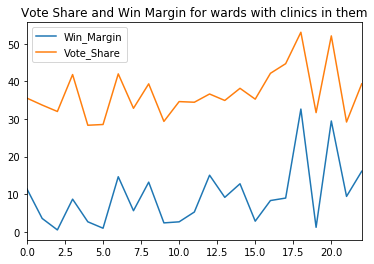

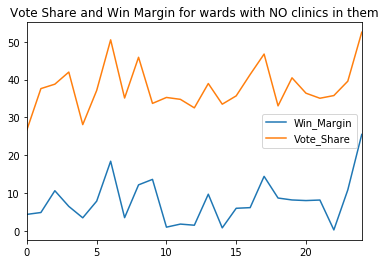

In [739]:
election_data[(election_data['Winner'] == "Aam Aadmi Party") & (election_data['Clinic'] == 1)].plot(y=['Win_Margin', 'Vote_Share'], use_index = False)
plt.title("Vote Share and Win Margin for wards with clinics in them")
election_data[(election_data['Winner'] == "Aam Aadmi Party") & (election_data['Clinic'] == 0)].plot(y=['Win_Margin', 'Vote_Share'], use_index = False)
plt.title("Vote Share and Win Margin for wards with NO clinics in them")
plt.show()

## Plots for BJP (Party that won MCD Elections)

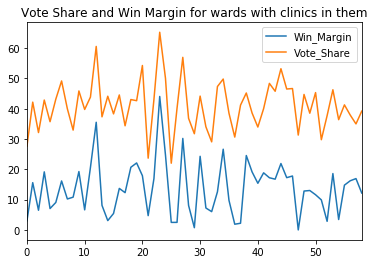

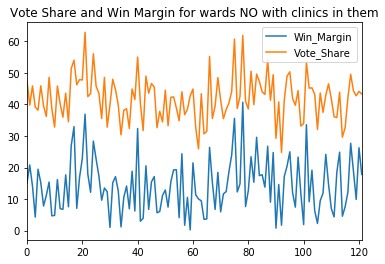

In [740]:
election_data[(election_data['Winner'] == "Bharatiya Janata Party") & (election_data['Clinic'] == 1)].plot(y=['Win_Margin', 'Vote_Share'], use_index = False)
plt.title("Vote Share and Win Margin for wards with clinics in them")
election_data[(election_data['Winner'] == "Bharatiya Janata Party") & (election_data['Clinic'] == 0)].plot(y=['Win_Margin', 'Vote_Share'], use_index = False)
plt.title("Vote Share and Win Margin for wards NO with clinics in them")

plt.show()

## Some Initial Regressions? 

In [586]:
import statsmodels.formula.api as sm
import numpy as np

In [587]:
election_data.rename(columns={'Win Margin ':'Win_Margin'}, inplace=True)

In [588]:
election_data.rename(columns={'Vote Share':'Vote_Share'}, inplace=True)

### Regress Win Margin on presence of clinic (for all wards) with controls for vote share and zone
(Regress **Win_Margin** Clinic Vote_Share Zone)

Highly insignificant effect of having a clinic functioning in ward

In [700]:
res = sm.ols(formula='Win_Margin ~ Clinic + Vote_Share + Zone', data=election_data[(election_data['Winner'] != "Aam Aadmi Party")]).fit()

In [701]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Win_Margin   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           3.42e-48
Time:                        17:18:16   Log-Likelihood:                -682.19
No. Observations:                 222   AIC:                             1374.
Df Residuals:                     217   BIC:                             1391.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -24.2553      2.205    -10.998

#### Regress Win Margin on presence of clinic (for all wards) with controls for vote share and zone ONLY in wards where AAP (party that established clinics and had it's name associated with them) won.
(Regress **Win_Margin** Clinic Vote_Share Zone)


Significant effect (p = 0.046) of having a clinic functioning in ward, around **2.48 percentage points** higher win margin when move from no clinic to having clinic in the ward..

In [728]:
res = sm.ols(formula='Win_Margin ~ Clinic + Vote_Share + C(Zone)', data=election_data[(election_data['Winner'] == "Aam Aadmi Party")]).fit()

In [729]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Win_Margin   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     24.18
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           1.58e-10
Time:                        17:26:30   Log-Likelihood:                -133.86
No. Observations:                  48   AIC:                             277.7
Df Residuals:                      43   BIC:                             287.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -28.1748      3.892  

## A few interesting points to note: 

1. "The Delhi state election commission has directed the Arvind Kejriwal government and the municipal corporations to remove the word ‘Aam’ from all bill boards, hoardings, name plates and banners in Aam Aadmi mohalla clinics and Aam Aadmi Byepass Express Service in the Capital as the model code of conduct is already in force for civic polls on April 22." This finding throws light on the reality of citizens identifying these clinics as party inittiatives as opposed to state-sponsored healthcare provision. 

2. There is evidence (in an Indian context) that that voters do significantly care about educational, electricity and communication facilities, whereas incumbents face defeat if they provide more medical or safe drinking water facilities (Paul and Denzau, 2006): "Does Public Good Provision Determine Incumbent’s Fate? Evidence from India" (https://mpra.ub.uni muenchen.de/11536/1/MPRA_paper_11536.pdf)

In [ ]:
res = sm.ols(formula='Win_Margin ~ Clinic + Vote_Share + C(Zone)', data=election_data[(election_data['Winner'] == "Aam Aadmi Party")]).fit()

In [1184]:
##election_data

In [927]:
election_2007 = pd.read_excel('2007_Results.xls',skiprows=[0,1,2,4], ignore_index=True)

In [928]:
election_2007['% of Votes Polled'].describe()

count    2570.000000
mean       10.587148
std        14.552986
min         0.040000
25%         0.820000
50%         2.860000
75%        16.402500
max        79.820000
Name: % of Votes Polled, dtype: float64

In [929]:
election_2007 = election_2007[['Ward No. & Name', 'Party Name ', 'Candidate Name', '% of Votes Polled']]

In [925]:
election_2007 = election_2007.fillna(method='ffill')

In [920]:
election_2007.loc[election_2007['Ward No. & Name'].str.contains("-"), 'Ward No. & Name'] = election_2007['Ward No. & Name'].str.split('-').str[1]

In [902]:
election_2007.loc[election_2007['Ward No. & Name'].str.contains('\('), 'Ward No. & Name'] = election_2007['Ward No. & Name'].str.split('\(').str[0]

In [1183]:
##election_2007

In [109]:
from tabula import read_pdf

In [966]:
import numpy as np
df = df.replace(np.nan, '', regex=True)

In [1115]:
x = []
found = False
for i in range(0, len(election_data)):
    for j in range(0, len(ward_list)):
        if (ward_list[j][1] == election_data.iloc[i]['Ward']):
            y = [[elem.strip().split(' ') for elem in ward_list[j]][0][1], i]
            x.append(y)

In [1175]:
for z in range(1, len(df)):
    for p in range(0, len(x)):
    
        if (x[p][0] == df['Ward No,Name Status'].str.split(',', 1).str[0][z]):
            if df.iloc[z]['Winner'] == "BHARATIYA JANATA PARTY":
                election_data.set_value(x[p][1], 'Margin_2012', round(float(df.iloc[z]['Votes Polled% Votes'].split(' ')[2]), 2))
            elif (df.iloc[z]['Ist Runner Up'] == "BHARATIYA JANATA PARTY"):
                election_data.set_value(x[p][1], 'Margin_2012', round(float(df.iloc[z]['% Votes']), 2))

In [1173]:
election_data['Margin_2012'] = election_data['Margin_2012'].astype(float)

In [1189]:
election_data.to_excel("results_with2012.xlsx")

In [120]:
links = []
from bs4 import BeautifulSoup
import urllib.request
import re

url = "http://www.delhi.gov.in/wps/wcm/connect/doit_dsec/Delhi+State+Election+Commission/Latest+Updates/Election+Result-MCD+2012/East+Delhi/"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
soup = BeautifulSoup(response, "lxml")
for link in soup.findAll('a', attrs={'href': re.compile("/wps/wcm/connect/")}):
    if ".pdf" in link.get('href'):
        links.append("http://www.delhi.gov.in" + link.get('href'))

In [1658]:
link = "https://www.ndtv.com/elections/delhi/mcd/ghuman-hera-mcd-south-ward-result"
request = urllib.request.Request(link)
response = urllib.request.urlopen(request)
soup = BeautifulSoup(response, "lxml")    

In [1659]:
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="NDTV" name="application-name"/><meta content="yes" name="mobile-web-app-capable"/><meta content="News" property="category"/><link crossorigin="" href="https://i.ndtvimg.com/" rel="preconnect"/><link crossorigin="" href="https://social.ndtv.com/" rel="preconnect"/><link crossorigin="" href="https://cdn.ndtv.com/" rel="preconnect"/><link crossorigin="" href="https://drop.ndtv.com/" rel="preconnect"/><link crossorigin="" href="https://static.social.ndtv.com/" rel="preconnect"/><link crossorigin="" href="https://fonts.googleapis.com/" rel="preconnect"/><link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect"/><link crossorig

In [1414]:
for p in links:
    for z in ward_list:
        ward_number = z[0].split(' ')[1]
        if "Ward-" + ward_number + ".pdf" in p:
            ward = z[1]
            table = read_pdf(p)
            if table is None:
                print(p)
            if table is not None:
                numerator = table[table['Party Name']  == "BHARATIYA JANATA PARTY"]['Votes Polled'].values[0]
                denominator = table[table['Party Name']  == "Total Votes Polled"]['Votes Polled'].values[0]
                vote_share = 100*(numerator/denominator)
                if (len(election_data.index[election_data['Ward'] == ward]) != 0):
                    election_data.set_value(election_data.index[election_data['Ward'] == ward][0], 'Margin_2012', vote_share)
                    del z

http://www.delhi.gov.in/wps/wcm/connect/56abfe804af0a5f1be76be926f0f9a50/Ward-50.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/fd85ae804af0a674be98be926f0f9a50/Ward-51.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/3f09a8804af0a958bf74bf926f0f9a50/Ward-52.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/3fc584804af0ad348083bc926f0f9a50/Ward-58.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/827b90004af0ce8e850abd926f0f9a50/Ward-95.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/1b6fac804af0d7a7857cbd926f0f9a50/Ward-99.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/e4e425004af0ea268731bf926f0f9a50/Ward-110.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/f34f4f804af0eb928789bf926f0f9a50/Ward-114.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/79f161804af0ed3887e1bf926f0f9a50/Ward-118.pdf?

In [1419]:
##election_data

In [1270]:
##election_data.set_value(election_data.index[election_data['Ward'] == 'Narela'][0], 'Margin_2012', 38.481)

In [1413]:
##ward_list = list(ward_numbers['Number'].str.split('-', 1))

In [1437]:
election_data['Margin_2017'] = -2.00000

In [1484]:
##election_data.set_value(election_data.index[election_data['Ward'] == 'East Patel Nagar'][0], 'Margin_2012', 49.49)
##election_data.set_value(election_data.index[election_data['Ward'] == 'Mayur Vihar Phase-I'][0], 'Margin_2012', 28.42)
##election_data.set_value(election_data.index[election_data['Ward'] == 'Bakhtawarpur'][0], 'Margin_2012', 17.83)
##election_data.set_value(election_data.index[election_data['Ward'] == 'Trilokpuri-East'][0], 'Margin_2017', float(24.15))
##election_data.set_value(election_data.index[election_data['Ward'] == 'Holambi Khurd'][0], 'Margin_2017', float(20.24))
len(election_data[(election_data['Margin_2012'] != -1) & (election_data['Winner'] == "Bharatiya Janata Party")])

129

In [1489]:
res = sm.ols(formula='Vote_Share ~ Margin_2012 + Margin_2012*Clinic + C(Zone)', data=election_data[(election_data['Margin_2012'] != -1)]).fit()



In [1490]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Vote_Share   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.598
Date:                Sat, 27 Oct 2018   Prob (F-statistic):            0.00397
Time:                        15:55:01   Log-Likelihood:                -623.35
No. Observations:                 188   AIC:                             1259.
Df Residuals:                     182   BIC:                             1278.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.0057      1

In [96]:
# election_data.set_value(268, 'Margin_2012', float(29.34))
# election_data.set_value(13, 'Margin_2012', 27.43)
# election_data.set_value(31, 'Margin_2012', 25.82)
# election_data.set_value(31, 'Margin_2017', 28.16)
# election_data.set_value(43, 'Margin_2012', 59.74)
# election_data.set_value(49, 'Margin_2012', 41.71)
# election_data.set_value(51, 'Margin_2012', 36.59)
# election_data.set_value(54, 'Margin_2017', 36.59)
# election_data.set_value(60, 'Margin_2017', 20.51)
# election_data.set_value(79, 'Margin_2012', 34.52)
# election_data.set_value(90, 'Margin_2012', 22.49)
# election_data.set_value(94, 'Margin_2012', 18.84)
# election_data.set_value(98, 'Margin_2012', 15.84)
# election_data.set_value(98, 'Margin_2017', 28.20)
# election_data.set_value(119, 'Margin_2012', 0.81)
# election_data.set_value(119, 'Margin_2017', 1.5)
# election_data.set_value(127, 'Margin_2012', 36.07)
# election_data.set_value(136, 'Margin_2012', 31.61)
# election_data.set_value(147, 'Margin_2012', 32.28)
# election_data.set_value(154, 'Margin_2012', 25.68)
# election_data.set_value(160, 'Margin_2012', 33.38)
# election_data.set_value(166, 'Margin_2012', 35.72)
# election_data.set_value(179, 'Margin_2012', 20.81)
# election_data.set_value(180, 'Margin_2012', 60.66)
# election_data.set_value(190, 'Margin_2012', 37.91)
# election_data.set_value(198, 'Margin_2012', 53.7)
# election_data.set_value(201, 'Margin_2012', 45.53)
# election_data.set_value(202, 'Margin_2012', 34.41)
# election_data.set_value(205, 'Margin_2012', 58.94)
# election_data.set_value(225, 'Margin_2012', 32.83)
# election_data.set_value(235, 'Margin_2012', 42.97)
# election_data.set_value(239, 'Margin_2012', 26.48)
# election_data.set_value(242, 'Margin_2012', 15.79)
# election_data.set_value(246, 'Margin_2012', 52.45)
# election_data.set_value(249, 'Margin_2012', 35.27)
# election_data.set_value(253, 'Margin_2012', 48.72)

In [1510]:
len(election_data['Ward'])

270

In [97]:
##links

In [1493]:
x = os.getcwd()
x

'/Users/arjunsoin/Desktop/Thesis Updates/Analysis'

In [90]:
##clinic_list

In [190]:
assemblies = pd.read_excel("ASSEMBLY.xlsx")

In [191]:
assemblies = assemblies.fillna(method='ffill')

In [201]:
assemblies.sort_values('AC Name ')

,AC Name,Ward Name,Population
82,ADARSH NAGAR,DHIRPUR,59496.0
80,ADARSH NAGAR,SARAI PIPAL THALA,63711.0
81,ADARSH NAGAR,ADARSH NAGAR,65010.0
247,AMBEDKAR NAGAR,MADANGIR,66192.0
248,AMBEDKAR NAGAR,PUSHP VIHAR,69012.0
249,AMBEDKAR NAGAR,KHANPUR,64453.0
49,BABARPUR,BABARPUR,53525.0
50,BABARPUR,JANTA COLONY,55365.0
48,BABARPUR,KARDAM PURI,64940.0
47,BABARPUR,SUBHASH MOHALLA,66483.0


In [1627]:
yeh = []
for x in range(0, len(election_data)):
    for y in range(0, len(assemblies)):
        if (election_data.iloc[x]['Ward'].lower() == assemblies.iloc[y]['Ward Name'].lower()):
            election_data.set_value(x, 'Assembly', assemblies.iloc[y]['AC Name '])

In [1571]:
election_data[election_data['Assembly'] == ' ']

,Zone,Ward,Winner,Name,Vote_Share,Win_Margin,Clinic,Margin_2012,Margin_2017,Assembly


In [1654]:
# election_data.set_value(election_data.index[election_data['Ward'] == "Budh Vihar"][0], 'Assembly', 'RITHALA')
# election_data.set_value(election_data.index[election_data['Ward'] == "Dwarka-A"][0], 'Assembly', 'MATIALA')
# election_data.set_value(election_data.index[election_data['Ward'] == "Mundka"][0], 'Assembly', 'MUNDKA')
# election_data.set_value(election_data.index[election_data['Ward'] == "Shalimar Bagh North"][0], 'Assembly', 'SHALIMAR BAGH')
# election_data.set_value(election_data.index[election_data['Ward'] == "Shalimar Bagh South"][0], 'Assembly', 'SHALIMAR BAGH')
# election_data.set_value(election_data.index[election_data['Ward'] == "Dakshin Puri"][0], 'Assembly', 'DEOLI')
# election_data.set_value(election_data.index[election_data['Ward'] == "Madanpur Khadar East"][0], 'Assembly', 'OKHLA')
# election_data.set_value(election_data.index[election_data['Ward'] == "Madanpur Khadar West"][0], 'Assembly', 'OKHLA')
# election_data.set_value(election_data.index[election_data['Ward'] == "Ramesh Nagar"][0], 'Assembly', 'MOTI NAGAR')
# election_data.set_value(election_data.index[election_data['Ward'] == "Tughlakabad"][0], 'Assembly', 'SANGAM VIHAR')
# election_data.set_value(election_data.index[election_data['Ward'] == "Said-Ul-Ajaib"][0], 'Assembly', 'CHHATARPUR')
# election_data.set_value(election_data.index[election_data['Ward'] == "Vasant Vihar"][0], 'Assembly', 'R K PURAM')
# election_data.set_value(election_data.index[election_data['Ward'] == "Shastri Park"][0], 'Assembly', 'GANDHI NAGAR')
# election_data.set_value(election_data.index[election_data['Ward'] == "Hari Nagar-A"][0], 'Assembly', 'HARI NAGAR')
# election_data.set_value(election_data.index[election_data['Ward'] == "Hari Nagar-B"][0], 'Assembly', 'HARI NAGAR')

In [1643]:
election_data = lol

In [1644]:
election_data = election_data.fillna(0)

In [199]:
election_data = election_data.sort_values('Assembly')

In [1656]:
election_data.to_excel("results_to_fill.xlsx")

In [195]:
election_data = pd.read_excel('results_to_fill.xlsx')

In [174]:
##election_data

In [196]:
for i in range(0, len(election_data)):
    if (election_data.iloc[i]['Winner'] == "Bharatiya Janata Party"):
        election_data.set_value(i, 'Margin_2017',election_data.iloc[i]['Vote Share'])

In [9]:
election_data = election_data.fillna(-1)

In [63]:
old_wards_df = pd.read_excel('set_oldwards.xlsx')

In [64]:
for x in range(0, len(old_wards_df)):
    old_wards_df.set_value(x, 'Ward', old_wards_df['Ward'].str.split('\(')[x][0])

In [65]:
for x in range(0, len(old_wards_df)):
    old_wards_df.set_value(x, 'Ward', old_wards_df.iloc[x]['Ward'].rstrip())

In [97]:
election_data[election_data['Ward'] == 'Mayur Vihar Phase-II']

,Zone,Ward,Winner,Name,Vote Share,Clinic,Assembly,Margin_2017
178,East,Mayur Vihar Phase-II,Bharatiya Janata Party,Bhavna Malik,45.87,0,PATPARGANJ,45.87


In [66]:
old_wards_df['Assembly'] = ' '

In [67]:
old_wards_df['2012_Share'] = -1.0000

In [68]:
for i in range(0, len(old_wards_df)):
    for j in range(0, len(election_data)):
        if (old_wards_df.iloc[i]['Ward'] == election_data.iloc[j]['Ward']):
            old_wards_df.set_value(i, 'Assembly',election_data.iloc[j]['Assembly'])

In [69]:
len(old_wards_df[old_wards_df['Assembly'] == ' '])

123

In [70]:
old_2012 = pd.read_excel('set_2012.xlsx')

In [71]:
for i in range(0, len(old_wards_df)):
    for j in range(0, len(old_2012)):
        if (old_wards_df.iloc[i]['Ward'] == old_2012.iloc[j]['Ward']):
            old_wards_df.set_value(i, '2012_Share',old_2012.iloc[j]['Margin_2012'])

In [142]:
old_wards_df.to_excel("2012_tofill.xlsx")

In [72]:
old_wards_df = pd.read_excel('2012_tofill.xlsx')

In [110]:
first = read_pdf("http://www.delhi.gov.in/wps/wcm/connect/3bc8f7004af00194b064bc926f0f9a50/Ward+Wise+Result+Sheet.pdf?MOD=AJPERES&lmod=-342544094", pages = "all", multiple_tables=True)

In [78]:
old_wards_df['2012_Share'].mean()

36.28309755181416

In [116]:
ward_numbers = pd.read_excel("ward_numbers.xlsx")

In [140]:
for p in links:
    for z in ward_list:
        ward_number = z[0].split(' ')[1]
        if "Ward-" + ward_number + ".pdf" in p:
            ward = z[1]
            table = read_pdf(p)
            if table is None:
                print(p)
            if table is not None:
                numerator = table[table['Party Name']  == "BHARATIYA JANATA PARTY"]['Votes Polled'].values[0]
                denominator = table[table['Party Name']  == "Total Votes Polled"]['Votes Polled'].values[0]
                vote_share = 100*(numerator/denominator)
                if (len(old_wards_df.index[old_wards_df['Ward'] == ward]) != 0):
                    index = old_wards_df.index[old_wards_df['Ward'] == ward][0]
                    if(old_wards_df.iloc[index]['2012_Share'] == -1):
                        old_wards_df.set_value(index, '2012_Share', vote_share)
                        del z

http://www.delhi.gov.in/wps/wcm/connect/56abfe804af0a5f1be76be926f0f9a50/Ward-50.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/fd85ae804af0a674be98be926f0f9a50/Ward-51.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/3f09a8804af0a958bf74bf926f0f9a50/Ward-52.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/3fc584804af0ad348083bc926f0f9a50/Ward-58.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/827b90004af0ce8e850abd926f0f9a50/Ward-95.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/1b6fac804af0d7a7857cbd926f0f9a50/Ward-99.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/e4e425004af0ea268731bf926f0f9a50/Ward-110.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/f34f4f804af0eb928789bf926f0f9a50/Ward-114.pdf?MOD=AJPERES&lmod=-1011637630
http://www.delhi.gov.in/wps/wcm/connect/79f161804af0ed3887e1bf926f0f9a50/Ward-118.pdf?

In [117]:
ward_list = list(ward_numbers['Number'].str.split('-', 1))

In [79]:
old_wards_df['2012_Share'].describe()

count    272.000000
mean      36.283098
std       14.661628
min       -1.000000
25%       25.791527
50%       35.810238
75%       46.966028
max       78.786465
Name: 2012_Share, dtype: float64

In [197]:
election_data['Margin_2017'].astype('float').describe()

count    272.000000
mean      36.114809
std       11.018451
min       -1.000000
25%       29.435000
50%       37.065000
75%       43.695000
max       65.220000
Name: Margin_2017, dtype: float64

## Assembly | Number of Wards 2012 |  Number of Wards 2017 | Population | Number of Clinics | Vote Share_2012 | Vote Share_2017 | Fixed effects & Controls

Fixed: Number of wards, population, area (size), number of metro stations (??), location (indicator for north, south east) + rented or porta cabin, number of dispensaries in assembly

Vote Share_2017 = a + b(Number of Clinics) + d(Vote Share_2012) + c(Number of Clinics * Vote Share_2012) + Assembly Fixed effects + 2017 fixed effects

In [95]:
##election_data.groupby('Assembly')['Clinic'].sum()

In [93]:
pd.options.display.max_rows = 300

In [152]:
election_data['Clinic'].value_counts()

0    183
1     87
Name: Clinic, dtype: int64

In [200]:
election_data

,Zone,Ward,Winner,Name,Vote Share,Clinic,Assembly,Margin_2017
0,North,Adarsh Nagar,Bharatiya Janata Party,Garima Gupta,43.83,1,ADARSH NAGAR,43.83
1,North,Dhirpur,Bharatiya Janata Party,Naveen Kumar Tyagi,45.79,0,ADARSH NAGAR,45.79
2,North,Sarai Pipal Thala,NaN,NaN,NaN,0,ADARSH NAGAR,-1
3,South,Madangir,Aam Aadmi Party,Dinesh Kumar,36.42,0,AMBEDKAR NAGAR,28.388
4,South,Pushp Vihar,Bharatiya Janata Party,Rekha,39.76,0,AMBEDKAR NAGAR,39.76
5,South,Khanpur,Bharatiya Janata Party,Suresh Kumar Gupta,44.42,0,AMBEDKAR NAGAR,44.42
6,East,Janta Colony,Bharatiya Janata Party,Sachin Sharma,31.50,0,BABARPUR,31.5
7,East,Kardam Puri,Aam Aadmi Party,Sazid,34.79,0,BABARPUR,32.98
8,East,Subhash Mohalla,Aam Aadmi Party,Rekha Tyagi,35.29,0,BABARPUR,34.28
9,East,Babarpur,Bharatiya Janata Party,Kusum Tomar,47.31,1,BABARPUR,47.31


In [202]:
##election_data.groupby('Assembly')["Clinic", "Margin_2017"].apply(lambda x : x.sum())

In [203]:
##election_data.groupby('Assembly')["Margin_2017"].apply(lambda x : x*100)

In [204]:
##election_data.groupby('Assembly')["Ward"].count()

In [209]:
election_data = election_data.sort_values(['Assembly','Ward'])

In [210]:
assemblies = assemblies.sort_values(['AC Name ','Ward Name'])

In [214]:
assemblies = assemblies.reset_index(drop=True)

In [216]:
election_data['Ward Population'] = assemblies['Population']

In [217]:
election_data

,Zone,Ward,Winner,Name,Vote Share,Clinic,Assembly,Margin_2017,Ward Population
0,North,Adarsh Nagar,Bharatiya Janata Party,Garima Gupta,43.83,1,ADARSH NAGAR,43.83,65010.0
1,North,Dhirpur,Bharatiya Janata Party,Naveen Kumar Tyagi,45.79,0,ADARSH NAGAR,45.79,59496.0
2,North,Sarai Pipal Thala,NaN,NaN,NaN,0,ADARSH NAGAR,-1,63711.0
5,South,Khanpur,Bharatiya Janata Party,Suresh Kumar Gupta,44.42,0,AMBEDKAR NAGAR,44.42,69012.0
3,South,Madangir,Aam Aadmi Party,Dinesh Kumar,36.42,0,AMBEDKAR NAGAR,28.388,64453.0
4,South,Pushp Vihar,Bharatiya Janata Party,Rekha,39.76,0,AMBEDKAR NAGAR,39.76,66192.0
9,East,Babarpur,Bharatiya Janata Party,Kusum Tomar,47.31,1,BABARPUR,47.31,66483.0
6,East,Janta Colony,Bharatiya Janata Party,Sachin Sharma,31.50,0,BABARPUR,31.5,53525.0
7,East,Kardam Puri,Aam Aadmi Party,Sazid,34.79,0,BABARPUR,32.98,55365.0
8,East,Subhash Mohalla,Aam Aadmi Party,Rekha Tyagi,35.29,0,BABARPUR,34.28,64940.0
